### Topic: Challenge Set 2
### Subject: Pandas & Movie Data
### Date: 01/21/17
### Name: Malik Salam

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
% matplotlib inline

In [34]:
df = pd.read_csv('2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
ReleaseMonth          100 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 6.3+ KB


In [36]:
df.ReleaseDate = pd.to_datetime(df.ReleaseDate)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.5+ KB


In [60]:
df[df.Rating == 'G']

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21


## Challenge 1

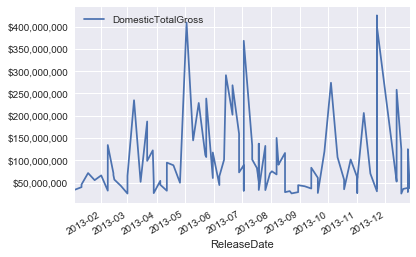

In [118]:
ax = df.plot(x = 'ReleaseDate', y = 'DomesticTotalGross');
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, pos : "${:,}".format(int(x))))

## Challenge 2

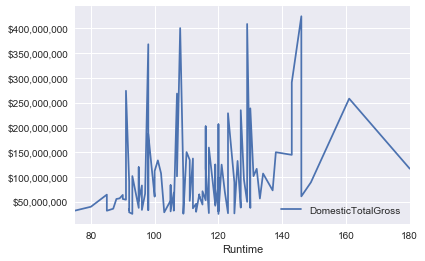

In [117]:
ax = df.sort_values(by='Runtime').plot(x = 'Runtime', y = 'DomesticTotalGross');
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, pos : "${:,}".format(int(x))))


## Challenge 3

In [57]:
df.groupby('Rating').mean().iloc[:,1:]\
                    .style.format({'Budget': '${:,.0f}',
                                   'DomesticTotalGross': '${:,.0f}',
                                   'Runtime': '{:,.0f} mins'
                                  })

,DomesticTotalGross,Runtime
Rating,,
G,"$268,492,764",107 mins
PG,"$131,135,716",100 mins
PG-13,"$111,449,769",118 mins
R,"$69,892,429",111 mins


## Challenge 4

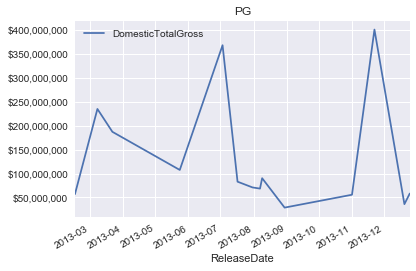

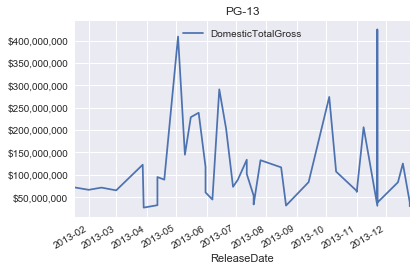

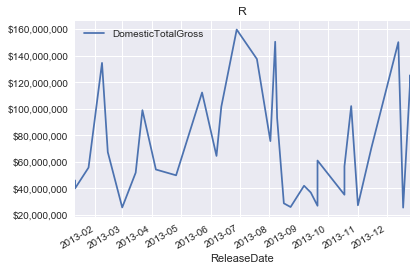

In [133]:
PG, PG13, R = df.dropna().groupby('Rating').plot(x = 'ReleaseDate', y = 'DomesticTotalGross');

PG.set_title('PG')
PG13.set_title('PG-13')
R.set_title('R')

PG.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, pos : "${:,}".format(int(x))))
PG13.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, pos : "${:,}".format(int(x))))
R.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, pos : "${:,}".format(int(x))))

## Challenge 5

In [113]:
df.groupby('Director').mean()[['DomesticTotalGross']] \
                      .sort_values(by = 'DomesticTotalGross', ascending=False)\
                      .head(10) \
                      .style.format('${:,.0f}')

,DomesticTotalGross
Director,
Francis Lawrence,"$424,668,047"
Shane Black,"$409,013,994"
Chris BuckJennifer Lee,"$400,738,009"
Pierre CoffinChris Renaud,"$368,061,265"
Zack Snyder,"$291,045,518"
Alfonso Cuaron,"$274,092,705"
Dan Scanlon,"$268,492,764"
Peter Jackson,"$258,366,855"
Justin Lin,"$238,679,850"


In [77]:
# Francis Lawrence takes it away for the hunger games

## Challenge 6

In [112]:
df['ReleaseMonth'] = df.ReleaseDate.dt.month
df.ReleaseMonth.head()

0    11
1     5
2    11
3     7
4     6
Name: ReleaseMonth, dtype: int64

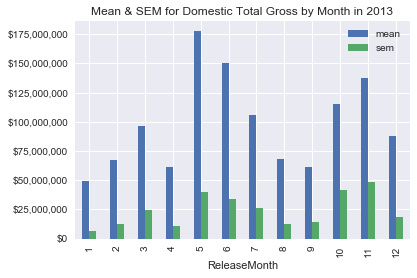

In [111]:
ax = df.groupby('ReleaseMonth').DomesticTotalGross \
                               .agg(['mean','sem'])\
                               .plot.bar()
ax.set_title('Mean & SEM for Domestic Total Gross by Month in 2013');
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, pos : "${:,}".format(int(x))))